## Importation des données et configuration du data set

In [385]:
# We import all the libraries we'll need for the exercise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We load the CSV file we need to study
housing_studying = pd.read_csv('/home/apprenant/Documents/Brief-6-Rachid-Karbiche/data/02_intermediate_data/cleaned_housing_data.csv')

## Exploration des données

In [386]:
round(housing_studying.describe())

,Unnamed: 0,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.0,6.0,1971.0,1985.0,1057.0,1163.0,1515.0,2.0,7.0,2.0,473.0,180921.0
std,422.0,1.0,30.0,21.0,439.0,387.0,525.0,1.0,2.0,1.0,214.0,79443.0
min,0.0,1.0,1872.0,1950.0,0.0,334.0,334.0,0.0,2.0,0.0,0.0,34900.0
25%,365.0,5.0,1954.0,1967.0,796.0,882.0,1130.0,1.0,5.0,1.0,334.0,129975.0
50%,730.0,6.0,1973.0,1994.0,992.0,1087.0,1464.0,2.0,6.0,2.0,480.0,163000.0
75%,1094.0,7.0,2000.0,2004.0,1298.0,1391.0,1777.0,2.0,7.0,2.0,576.0,214000.0
max,1459.0,10.0,2010.0,2010.0,6110.0,4692.0,5642.0,3.0,14.0,4.0,1418.0,755000.0


En reprenant les résultats du document data_cleaning, on relève que la donnée la plus corrélée avec SalePrice est OverallQual avec un coefficient de corrélation linéaire de 0.791. Cependant, OverallQuality est une variable numérique discrète, ce qui serait problématique dans le cadre d'une régression linéaire. Nous allons donc étudier la deuxième variable la plus corrélée avec SalePrice qui est GrLivArea, qui, elle, est une variable numérique continue. Faisons donc un nuage de points entre ces deux variables :

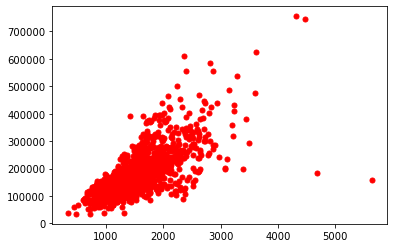

In [387]:
# On affiche le nuage de points dont on dispose
# Test
plt.plot(housing_studying['GrLivArea'], housing_studying['SalePrice'], 'ro', markersize=5)
plt.show()

## Choix du modèle de machine learning

En voyant ce nuage de points, on remarque que le prix d'une maison semble augmenter en fonction de la qualité des matériaux et de la finition de cette même maison. On peut donc émettre une hypothèse de modélisation du phénomène qui serait qu'elle aurait la forme d'une droite. 

## Préparation des données

### Sélection de la variable cible et des variables explicatives

On définit à présent notre variable cible

In [388]:
y = housing_studying.SalePrice

Ainsi que nos variables explicatives

In [389]:
x = housing_studying[['GrLivArea']]

### Division du jeu de données en training/validation/testing sets

In [390]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)

## Apprentissage sur le training set

On implémente la regression linéaire

In [391]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

On obtient ainsi les paramètres β1 et β0 de notre modèle

In [392]:
print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr.coef_[0],2),round(regr.intercept_)))

print("\n")

print("On comprend donc que toute maison coûte à la base {} € auquel il faut ajouter {} € par unité de surface habitable"
     .format(round(regr.intercept_),round(regr.coef_[0],2)))

Le coefficient β1 est égal à 107.08 tandis que l'intercept β0 est égal à 19729


On comprend donc que toute maison coûte à la base 19729 € auquel il faut ajouter 107.08 € par unité de surface habitable


In [393]:
x_to_predict = 1000
x_df =  pd.DataFrame({'GrLivArea': [x_to_predict]})

print("Selon le modèle, une maison mesurant {} unités de surface habitable coûtera {} €"
      .format(x_to_predict, round(regr.predict(x_df)[0])))

print("\n")

print ("On remarque que {} * {} + {} = {}"
       .format(x_to_predict,round(regr.coef_[0],2),round(regr.intercept_),
               x_to_predict*round(regr.coef_[0],2)+round(regr.intercept_)))

Selon le modèle, une maison mesurant 1000 unités de surface habitable coûtera 126809 €


On remarque que 1000 * 107.08 + 19729 = 126809.0


Représentons notre modèle linéaire

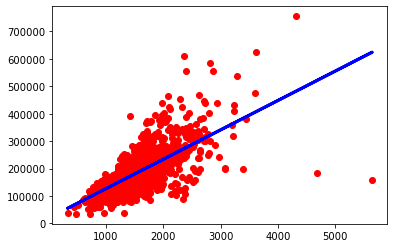

In [394]:
ytrainpred = regr.predict(xtrain)

# Plot outputs
plt.scatter(xtrain, ytrain,  color='red')
plt.plot(xtrain, ytrainpred, color='blue', linewidth=3)

plt.show()

## Evaluation du modèle sur le testing set

In [395]:
from sklearn.metrics import mean_squared_error, r2_score

Evaluation à partir du R2

In [396]:
ytrainpred = regr.predict(xtrain)
ytestpred = regr.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))

Pour les données d'entrainement le R2 vaut 0.496 alors que pour les données de test, il est de 0.526


Le coefficient de détermination R2 étant proche de 1, le modèle de regression linéaire est plutôt bon. De plus les R2 des jeux d'entrainement et de test sont proches donc le modèle est robuste.

Evaluation à partir du RMSE

In [397]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain, ytrainpred, squared=False),3), 
              round(mean_squared_error(ytest, ytestpred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 56801.975 alors que pour les données de test, il est de 52907.767


Evaluation graphique

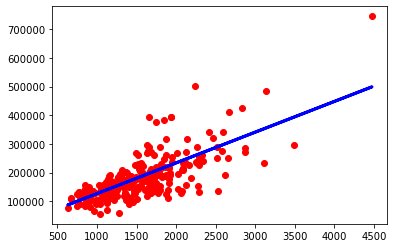

In [398]:
# Plot outputs
plt.scatter(xtest, ytest,  color='red')
plt.plot(xtest, ytestpred, color='blue', linewidth=3)

plt.show()

## Création d'un modèle avec plusieurs variables explicatives 

Prenons plusieurs variables :

In [399]:
x_multiple = housing_studying[['OverallQual','GrLivArea', 'GarageCars']]

In [400]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x_multiple, y, train_size=0.8)
regr2 = linear_model.LinearRegression()
regr2.fit(xtrain2, ytrain2)

LinearRegression()

In [401]:
print("Les coefficients β1 sont égaux à {}, {} et {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr2.coef_[0],2), round(regr2.coef_[1],2), round(regr2.coef_[2],2), round(regr2.intercept_)))

Les coefficients β1 sont égaux à 26451.2, 58.28 et 19626.4 tandis que l'intercept β0 est égal à -103264


In [402]:
qual_to_predict = 7
gr_area_to_predict = 1000
garage_cars_to_predict = 2
x_df2 =  pd.DataFrame({'OverallQual': [qual_to_predict], 'GrLivArea': [gr_area_to_predict], 'GarageCars': [garage_cars_to_predict]})

print("Selon le modèle, une maison ayant une qualité de finition de {}/10, {} unités de surface habitable et {} voitures dans le garage coûtera {} €"
      .format(qual_to_predict, gr_area_to_predict, garage_cars_to_predict, round(regr2.predict(x_df2)[0])))

print("\n")

print ("On remarque que ({} * {} + {} * {} + {} * {}) + {} = {}"
       .format(qual_to_predict,round(regr2.coef_[0],2), gr_area_to_predict, round(regr2.coef_[1],2), garage_cars_to_predict, round(regr2.coef_[2],2), round(regr2.intercept_), qual_to_predict*round(regr2.coef_[0],2) + gr_area_to_predict*round(regr2.coef_[1],2) + garage_cars_to_predict*round(regr2.coef_[2],2) + round(regr2.intercept_)))

Selon le modèle, une maison ayant une qualité de finition de 7/10, 1000 unités de surface habitable et 2 voitures dans le garage coûtera 179430 €


On remarque que (7 * 26451.2 + 1000 * 58.28 + 2 * 19626.4) + -103264 = 179427.2


Représentons notre modèle linéaire

In [403]:
ytrain2pred = regr2.predict(xtrain2)
ytest2pred = regr2.predict(xtest2)

xytrain = xtrain2.join(ytrain2)
xytrain['prediction'] = ytrain2pred

# Plot outputs
# plt.scatter(xtrain2['OverallQual'], ytrain2,  color='red')
# plt.plot(xtrain2['OverallQual'], ytrain2pred, color='blue', linewidth=3)

# plt.show()

In [404]:
xytrain.head()

,OverallQual,GrLivArea,GarageCars,SalePrice,prediction
889,6,1505,2,149500,182410.980652
1383,5,1416,2,112000,150772.663387
1394,7,1500,3,246578,228197.172347
42,5,884,2,144000,119766.529153
968,3,968,0,37900,32507.029096


## Evaluation du modèle sur le testing set

### Evaluation à partir de R2

In [405]:
print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain2, ytrain2pred),3), round(r2_score(ytest2, ytest2pred),3)))

Pour les données d'entrainement le R2 vaut 0.756 alors que pour les données de test, il est de 0.663


Le coefficient de détermination R2 étant proche de 1, le modèle de regression linéaire est plutôt bon. De plus les R2 des jeux d'entrainement et de test sont proches donc le modèle est robuste

### Evaluation à partir du RMSE

In [406]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain2, ytrain2pred, squared=False),3), 
              round(mean_squared_error(ytest2, ytest2pred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 39287.14 alors que pour les données de test, il est de 45914.671


Evaluation graphique

## Régression Ridge multivariée

In [407]:
regr3 = linear_model.Ridge(alpha=.5)
regr3.fit(xtrain2, ytrain2)

Ridge(alpha=0.5)

In [408]:
regr3.coef_

array([26445.69260872,    58.30088754, 19611.53127637])

In [409]:
print("Les coefficients β1 sont égaux à {}, {} et {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr3.coef_[0],2), round(regr3.coef_[1],2), round(regr3.coef_[2],2), round(regr3.intercept_)))

Les coefficients β1 sont égaux à 26445.69, 58.3 et 19611.53 tandis que l'intercept β0 est égal à -103232


In [410]:
qual2_to_predict = 7
gr_area2_to_predict = 1000
garage_cars2_to_predict = 2
x_df3 =  pd.DataFrame({'OverallQual': [qual_to_predict], 'GrLivArea': [gr_area_to_predict], 'GarageCars': [garage_cars_to_predict]})

print("Selon le modèle, une maison ayant une qualité de finition de {}/10, {} unités de surface habitable et {} voitures dans le garage coûtera {} €"
      .format(qual2_to_predict, gr_area2_to_predict, garage_cars2_to_predict, round(regr3.predict(x_df3)[0])))

print("\n")

print ("On remarque que ({} * {} + {} * {} + {} * {}) + {} = {}"
       .format(qual2_to_predict,round(regr3.coef_[0],2), gr_area2_to_predict, round(regr3.coef_[1],2), garage_cars2_to_predict, round(regr3.coef_[2],2), round(regr3.intercept_), qual2_to_predict*round(regr3.coef_[0],2) + gr_area2_to_predict*round(regr3.coef_[1],2) + garage_cars2_to_predict*round(regr3.coef_[2],2) + round(regr3.intercept_)))

Selon le modèle, une maison ayant une qualité de finition de 7/10, 1000 unités de surface habitable et 2 voitures dans le garage coûtera 179412 €


On remarque que (7 * 26445.69 + 1000 * 58.3 + 2 * 19611.53) + -103232 = 179410.89


In [411]:
ytrain3pred = regr3.predict(xtrain2)
ytest3pred = regr3.predict(xtest2)

xytrain2 = xtrain2.join(ytrain2)
xytrain2['prediction'] = ytrain3pred

## Evaluation du modèle sur le testing set

### Evaluation à partir de R2

In [412]:
print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain2, ytrain3pred),3), round(r2_score(ytest2, ytest3pred),3)))

Pour les données d'entrainement le R2 vaut 0.756 alors que pour les données de test, il est de 0.663


### Evaluation à partir du RMSE

In [413]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain2, ytrain3pred, squared=False),3), 
              round(mean_squared_error(ytest2, ytest3pred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 39287.142 alors que pour les données de test, il est de 45917.062


## Régression Lasso multivariée

In [414]:
regr4 = linear_model.Lasso(alpha=0.1)
regr4.fit(xtrain2, ytrain2)

Lasso(alpha=0.1)

In [415]:
regr4.coef_

array([26451.17552884,    58.28238744, 19626.19586671])

In [416]:
print("Les coefficients β1 sont égaux à {}, {} et {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr4.coef_[0],2), round(regr4.coef_[1],2), round(regr4.coef_[2],2), round(regr4.intercept_)))

Les coefficients β1 sont égaux à 26451.18, 58.28 et 19626.2 tandis que l'intercept β0 est égal à -103264


In [417]:
qual3_to_predict = 7
gr_area3_to_predict = 1000
garage_cars3_to_predict = 2
x_df4 =  pd.DataFrame({'OverallQual': [qual_to_predict], 'GrLivArea': [gr_area_to_predict], 'GarageCars': [garage_cars_to_predict]})

print("Selon le modèle, une maison ayant une qualité de finition de {}/10, {} unités de surface habitable et {} voitures dans le garage coûtera {} €"
      .format(qual3_to_predict, gr_area3_to_predict, garage_cars3_to_predict, round(regr4.predict(x_df4)[0])))

print("\n")

print ("On remarque que ({} * {} + {} * {} + {} * {}) + {} = {}"
       .format(qual3_to_predict,round(regr4.coef_[0],2), gr_area3_to_predict, round(regr4.coef_[1],2), garage_cars3_to_predict, round(regr4.coef_[2],2), round(regr4.intercept_), qual3_to_predict*round(regr4.coef_[0],2) + gr_area3_to_predict*round(regr4.coef_[1],2) + garage_cars3_to_predict*round(regr4.coef_[2],2) + round(regr4.intercept_)))

Selon le modèle, une maison ayant une qualité de finition de 7/10, 1000 unités de surface habitable et 2 voitures dans le garage coûtera 179430 €


On remarque que (7 * 26451.18 + 1000 * 58.28 + 2 * 19626.2) + -103264 = 179426.66000000003


In [418]:
ytrain4pred = regr4.predict(xtrain2)
ytest4pred = regr4.predict(xtest2)

xytrain3 = xtrain.join(ytrain2)
xytrain3['prediction'] = ytrain4pred

## Evaluation du modèle sur le testing set

### Evaluation à partir de R2

In [419]:
print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain2, ytrain4pred),3), round(r2_score(ytest2, ytest4pred),3)))

Pour les données d'entrainement le R2 vaut 0.756 alors que pour les données de test, il est de 0.663


### Evaluation à partir du RMSE

In [420]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain2, ytrain4pred, squared=False),3), 
              round(mean_squared_error(ytest2, ytest4pred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 39287.14 alors que pour les données de test, il est de 45914.697
